# Build CNN

## Loading image data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D, Dropout, Flatten, add, Reshape
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from skimage.transform import resize
#import cv2

from PIL import Image
import os
from shutil import copyfile

In [2]:
os.getcwd()
#os.chdir('/Users/qingruan/Desktop/九章算法项目课件/')

'/groups/dats6501/carrieqing'

In [3]:
category_names = [
'agricultural',
    'airplane', 'baseballdiamond', 'beach', 
    'buildings', 'chaparral', 'denseresidential', 'forest', 
    'freeway', 'golfcourse', 'harbor', 'intersection', 
    'mediumresidential', 'mobilehomepark', 
    'overpass', 'parkinglot', 'river', 'runway', 
    'sparseresidential', 'storagetanks', 'tenniscourt'
]

In [4]:
num_images = 100  # per category
nb_classes = len(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [5]:
# Load the numpy datasets
images_orig = np.load('new data/UCMerced_images_orig_MultiClass21.npy')
labels_num = np.load('new data/UCMerced_labels_num_MultiClass21.npy')

# Convert labels to categorical 'one hot encoded vector' --> required format for softmax cross-entropy loss.
# Create an array of zeros with length nb_classes and put a 1 at the index of the true label.
labels = to_categorical(labels_num, nb_classes)

print('Orginal Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels_num[i])

print('One-hot encoded Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels[i])

print('\nImages shape: {}'.format(images_orig.shape))
print('\nLabel shape: {}'.format(labels.shape))

Orginal Labels: 

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
One-hot encoded Labels: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

In [6]:
nb_images = images_orig.shape[0]
nb_images

2100

## Train/val/test Split

In [7]:
nb_images = images_orig.shape[0]
nb_images

2100

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_orig, labels, 
                                                    test_size=0.2, 
                                                    stratify = labels, 
                                                    random_state=2021)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  stratify = y_train,
                                                  random_state=2021) 

# 0.25 x 0.8 = 0.2

In [9]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape,)

(1260, 64, 64, 3) (420, 64, 64, 3) (420, 64, 64, 3) (1260, 21) (420, 21) (420, 21)


Check how many images per class in train/val/test

In [10]:
def unique_counts(arr):
    unique, counts = np.unique(arr, axis=0, return_counts=True)
    unique_num = [np.where(r==1)[0][0] for r in unique] 
    print(dict(zip(unique_num, counts)))

In [11]:
unique_counts(y_train)
unique_counts(y_val)
unique_counts(y_test)

{20: 60, 19: 60, 18: 60, 17: 60, 16: 60, 15: 60, 14: 60, 13: 60, 12: 60, 11: 60, 10: 60, 9: 60, 8: 60, 7: 60, 6: 60, 5: 60, 4: 60, 3: 60, 2: 60, 1: 60, 0: 60}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}


## Building basic CNN

### [1] Build architecture

conv1: 32*(3,3) filter, same padding, relu + maxpooling; conv2: 64*(3,3) filter, same padding, relu + maxpooling
dropout 0.5
softmax

In [12]:
# parameters:
input_shape = (64, 64, 3)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_hidden = 0.5              # drop probability for dropout @ dense layer

def define_CNN_base():

    model = Sequential()

    # conv1 layer
    model.add(Conv2D(filters=64, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     input_shape=input_shape))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))
    
    # conv2 layer
    model.add(Conv2D(filters=128, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     ))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))
    
    # conv3 layer
    model.add(Conv2D(filters=256, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     ))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    # conv4 layer
    model.add(Conv2D(filters=512, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                   ))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    model.add(Flatten())

    # fc1 layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))
    
    # fc2 layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))

    # The output of the model (softmax)
    model.add(Dense(21, activation='softmax'))
    return model

# clear the session first, such that layer names start with index 1
K.clear_session()
model_CNN_base = define_CNN_base()

In [13]:
model_CNN_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         1

### [2]Compile Model

In [14]:
# set your architecture
model = define_CNN_base()

In [15]:
# Define an optimizer
base_learning_rate=0.001

opt = Adam(lr=base_learning_rate)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])       

In [16]:
checkpoint_best_model = 'model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5'

# To monitor loss, mode min and set patience to 30 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=600)
# Use path defined above, and save best only 
mc = ModelCheckpoint(checkpoint_best_model, monitor='val_accuracy', mode='max', verbose=1, 
                    save_best_only=True)

## Train Model

In [17]:
# Set hyper parameters
epochs = 1000
batch_size = 32
batches_per_epoch = y_train.shape[0]//batch_size
# the number of batches to see the full validation data:
validation_steps = y_val.shape[0]//batch_size

In [18]:
# Data Generator provided by keras to load the training data in batches
image_gen = ImageDataGenerator(
    zoom_range = 0.1,
    width_shift_range=5,   # pixel
    height_shift_range=5,  # pixel
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20)

# At Test/Validation time without data augmentation
image_gen_test = ImageDataGenerator()

train_gen = image_gen.flow(np.array(X_train),
                           y_train,
                           batch_size = batch_size,
                           shuffle = True)
val_gen = image_gen_test.flow(np.array(X_val),
                              y_val,
                              batch_size = batch_size,
                              shuffle = True)

In [19]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1260, 64, 64, 3), (420, 64, 64, 3), (1260, 21), (420, 21))

Training commences by making a call to the fit method with our training and validation sets

In [20]:
# Fit the model parameters
print('training...')

history = model.fit(
                x=train_gen,
                steps_per_epoch=batches_per_epoch, 
                epochs=epochs, 
                validation_data=val_gen,
                validation_steps=validation_steps,
                callbacks=[es, mc],
                verbose = 2,
                )

print('done')

training...
Epoch 1/1000
39/39 - 5s - loss: 3.0492 - accuracy: 0.0415 - val_loss: 3.0035 - val_accuracy: 0.0481

Epoch 00001: val_accuracy improved from -inf to 0.04808, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 2/1000
39/39 - 4s - loss: 3.0276 - accuracy: 0.0440 - val_loss: 2.9912 - val_accuracy: 0.0962

Epoch 00002: val_accuracy improved from 0.04808 to 0.09615, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 3/1000
39/39 - 3s - loss: 2.9853 - accuracy: 0.0765 - val_loss: 3.0019 - val_accuracy: 0.0601

Epoch 00003: val_accuracy did not improve from 0.09615
Epoch 4/1000
39/39 - 3s - loss: 2.9210 - accuracy: 0.0798 - val_loss: 2.8439 - val_accuracy: 0.1154

Epoch 00004: val_accuracy improved from 0.09615 to 0.11538, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 5/1000
39/39 - 3s - loss: 2.8671 - accuracy: 0.0985 - val_loss: 2.7558 - val_accuracy: 0.1226

Epoch 00005: val_accuracy improved from 0.11538 to 0.12260, savin


Epoch 00044: val_accuracy did not improve from 0.60337
Epoch 45/1000
39/39 - 3s - loss: 1.2774 - accuracy: 0.5393 - val_loss: 1.2549 - val_accuracy: 0.6154

Epoch 00045: val_accuracy improved from 0.60337 to 0.61538, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 46/1000
39/39 - 3s - loss: 1.2215 - accuracy: 0.5668 - val_loss: 1.1071 - val_accuracy: 0.6611

Epoch 00046: val_accuracy improved from 0.61538 to 0.66106, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 47/1000
39/39 - 3s - loss: 1.2428 - accuracy: 0.5871 - val_loss: 1.4491 - val_accuracy: 0.5697

Epoch 00047: val_accuracy did not improve from 0.66106
Epoch 48/1000
39/39 - 3s - loss: 1.2658 - accuracy: 0.5774 - val_loss: 1.3305 - val_accuracy: 0.5841

Epoch 00048: val_accuracy did not improve from 0.66106
Epoch 49/1000
39/39 - 3s - loss: 1.2774 - accuracy: 0.5684 - val_loss: 1.2293 - val_accuracy: 0.6130

Epoch 00049: val_accuracy did not improve from 0.66106
Epoch 50/1000
39/39 - 3s 


Epoch 00092: val_accuracy did not improve from 0.79567
Epoch 93/1000
39/39 - 3s - loss: 0.5963 - accuracy: 0.8086 - val_loss: 0.7811 - val_accuracy: 0.7764

Epoch 00093: val_accuracy did not improve from 0.79567
Epoch 94/1000
39/39 - 3s - loss: 0.5884 - accuracy: 0.8094 - val_loss: 0.7960 - val_accuracy: 0.7716

Epoch 00094: val_accuracy did not improve from 0.79567
Epoch 95/1000
39/39 - 3s - loss: 0.6108 - accuracy: 0.7915 - val_loss: 1.0097 - val_accuracy: 0.7356

Epoch 00095: val_accuracy did not improve from 0.79567
Epoch 96/1000
39/39 - 3s - loss: 0.7101 - accuracy: 0.7752 - val_loss: 0.9700 - val_accuracy: 0.7236

Epoch 00096: val_accuracy did not improve from 0.79567
Epoch 97/1000
39/39 - 3s - loss: 0.6161 - accuracy: 0.7907 - val_loss: 0.8987 - val_accuracy: 0.7668

Epoch 00097: val_accuracy did not improve from 0.79567
Epoch 98/1000
39/39 - 3s - loss: 0.5901 - accuracy: 0.7964 - val_loss: 0.7830 - val_accuracy: 0.7764

Epoch 00098: val_accuracy did not improve from 0.79567
Ep


Epoch 00142: val_accuracy did not improve from 0.82212
Epoch 143/1000
39/39 - 3s - loss: 0.3966 - accuracy: 0.8844 - val_loss: 0.7987 - val_accuracy: 0.8077

Epoch 00143: val_accuracy did not improve from 0.82212
Epoch 144/1000
39/39 - 3s - loss: 0.3662 - accuracy: 0.8925 - val_loss: 0.8577 - val_accuracy: 0.8053

Epoch 00144: val_accuracy did not improve from 0.82212
Epoch 145/1000
39/39 - 3s - loss: 0.3955 - accuracy: 0.8738 - val_loss: 0.6603 - val_accuracy: 0.8293

Epoch 00145: val_accuracy improved from 0.82212 to 0.82933, saving model to model/MultiClass_1Conv_1Conv_1Conv_1Conv.hdf5
Epoch 146/1000
39/39 - 3s - loss: 0.3721 - accuracy: 0.8795 - val_loss: 0.8352 - val_accuracy: 0.7933

Epoch 00146: val_accuracy did not improve from 0.82933
Epoch 147/1000
39/39 - 3s - loss: 0.3641 - accuracy: 0.8762 - val_loss: 0.9363 - val_accuracy: 0.7764

Epoch 00147: val_accuracy did not improve from 0.82933
Epoch 148/1000
39/39 - 3s - loss: 0.3786 - accuracy: 0.8713 - val_loss: 0.9715 - val_ac


Epoch 00192: val_accuracy did not improve from 0.84856
Epoch 193/1000
39/39 - 3s - loss: 0.2930 - accuracy: 0.9112 - val_loss: 0.8776 - val_accuracy: 0.8125

Epoch 00193: val_accuracy did not improve from 0.84856
Epoch 194/1000
39/39 - 3s - loss: 0.2953 - accuracy: 0.9129 - val_loss: 0.8022 - val_accuracy: 0.8245

Epoch 00194: val_accuracy did not improve from 0.84856
Epoch 195/1000
39/39 - 3s - loss: 0.2280 - accuracy: 0.9267 - val_loss: 0.6887 - val_accuracy: 0.8486

Epoch 00195: val_accuracy did not improve from 0.84856
Epoch 196/1000
39/39 - 3s - loss: 0.2371 - accuracy: 0.9218 - val_loss: 0.8400 - val_accuracy: 0.8149

Epoch 00196: val_accuracy did not improve from 0.84856
Epoch 197/1000
39/39 - 3s - loss: 0.2627 - accuracy: 0.9251 - val_loss: 0.8685 - val_accuracy: 0.8389

Epoch 00197: val_accuracy did not improve from 0.84856
Epoch 198/1000
39/39 - 3s - loss: 0.2645 - accuracy: 0.9161 - val_loss: 0.7449 - val_accuracy: 0.8197

Epoch 00198: val_accuracy did not improve from 0.84


Epoch 00243: val_accuracy did not improve from 0.86538
Epoch 244/1000
39/39 - 3s - loss: 0.2484 - accuracy: 0.9202 - val_loss: 1.1740 - val_accuracy: 0.8005

Epoch 00244: val_accuracy did not improve from 0.86538
Epoch 245/1000
39/39 - 3s - loss: 0.3468 - accuracy: 0.8925 - val_loss: 0.7662 - val_accuracy: 0.8438

Epoch 00245: val_accuracy did not improve from 0.86538
Epoch 246/1000
39/39 - 3s - loss: 0.2151 - accuracy: 0.9373 - val_loss: 0.6736 - val_accuracy: 0.8510

Epoch 00246: val_accuracy did not improve from 0.86538
Epoch 247/1000
39/39 - 3s - loss: 0.2078 - accuracy: 0.9414 - val_loss: 0.7917 - val_accuracy: 0.8606

Epoch 00247: val_accuracy did not improve from 0.86538
Epoch 248/1000
39/39 - 3s - loss: 0.2825 - accuracy: 0.9235 - val_loss: 0.8622 - val_accuracy: 0.8341

Epoch 00248: val_accuracy did not improve from 0.86538
Epoch 249/1000
39/39 - 3s - loss: 0.1850 - accuracy: 0.9381 - val_loss: 0.8317 - val_accuracy: 0.8486

Epoch 00249: val_accuracy did not improve from 0.86

39/39 - 3s - loss: 0.1415 - accuracy: 0.9577 - val_loss: 0.9338 - val_accuracy: 0.8413

Epoch 00295: val_accuracy did not improve from 0.86779
Epoch 296/1000
39/39 - 3s - loss: 0.1354 - accuracy: 0.9617 - val_loss: 0.9629 - val_accuracy: 0.8341

Epoch 00296: val_accuracy did not improve from 0.86779
Epoch 297/1000
39/39 - 3s - loss: 0.1616 - accuracy: 0.9520 - val_loss: 0.8565 - val_accuracy: 0.8510

Epoch 00297: val_accuracy did not improve from 0.86779
Epoch 298/1000
39/39 - 3s - loss: 0.1338 - accuracy: 0.9520 - val_loss: 0.8479 - val_accuracy: 0.8558

Epoch 00298: val_accuracy did not improve from 0.86779
Epoch 299/1000
39/39 - 3s - loss: 0.1194 - accuracy: 0.9585 - val_loss: 0.8898 - val_accuracy: 0.8413

Epoch 00299: val_accuracy did not improve from 0.86779
Epoch 300/1000
39/39 - 3s - loss: 0.1264 - accuracy: 0.9585 - val_loss: 0.9127 - val_accuracy: 0.8413

Epoch 00300: val_accuracy did not improve from 0.86779
Epoch 301/1000
39/39 - 3s - loss: 0.1578 - accuracy: 0.9577 - val_l


Epoch 00346: val_accuracy did not improve from 0.87260
Epoch 347/1000
39/39 - 3s - loss: 0.1331 - accuracy: 0.9585 - val_loss: 0.7905 - val_accuracy: 0.8606

Epoch 00347: val_accuracy did not improve from 0.87260
Epoch 348/1000
39/39 - 3s - loss: 0.1012 - accuracy: 0.9715 - val_loss: 0.8255 - val_accuracy: 0.8630

Epoch 00348: val_accuracy did not improve from 0.87260
Epoch 349/1000
39/39 - 3s - loss: 0.1057 - accuracy: 0.9650 - val_loss: 0.8798 - val_accuracy: 0.8654

Epoch 00349: val_accuracy did not improve from 0.87260
Epoch 350/1000
39/39 - 3s - loss: 0.0928 - accuracy: 0.9715 - val_loss: 0.8213 - val_accuracy: 0.8606

Epoch 00350: val_accuracy did not improve from 0.87260
Epoch 351/1000
39/39 - 3s - loss: 0.1656 - accuracy: 0.9479 - val_loss: 0.8864 - val_accuracy: 0.8462

Epoch 00351: val_accuracy did not improve from 0.87260
Epoch 352/1000
39/39 - 3s - loss: 0.1139 - accuracy: 0.9609 - val_loss: 0.8898 - val_accuracy: 0.8726

Epoch 00352: val_accuracy did not improve from 0.87

39/39 - 3s - loss: 0.1227 - accuracy: 0.9593 - val_loss: 0.8549 - val_accuracy: 0.8510

Epoch 00398: val_accuracy did not improve from 0.88702
Epoch 399/1000
39/39 - 3s - loss: 0.1901 - accuracy: 0.9487 - val_loss: 1.1574 - val_accuracy: 0.8125

Epoch 00399: val_accuracy did not improve from 0.88702
Epoch 400/1000
39/39 - 3s - loss: 0.2072 - accuracy: 0.9471 - val_loss: 0.7571 - val_accuracy: 0.8702

Epoch 00400: val_accuracy did not improve from 0.88702
Epoch 401/1000
39/39 - 3s - loss: 0.1725 - accuracy: 0.9511 - val_loss: 1.2114 - val_accuracy: 0.8077

Epoch 00401: val_accuracy did not improve from 0.88702
Epoch 402/1000
39/39 - 3s - loss: 0.2357 - accuracy: 0.9406 - val_loss: 0.8893 - val_accuracy: 0.8293

Epoch 00402: val_accuracy did not improve from 0.88702
Epoch 403/1000
39/39 - 3s - loss: 0.1600 - accuracy: 0.9520 - val_loss: 0.7997 - val_accuracy: 0.8606

Epoch 00403: val_accuracy did not improve from 0.88702
Epoch 404/1000
39/39 - 3s - loss: 0.1504 - accuracy: 0.9528 - val_l


Epoch 00449: val_accuracy did not improve from 0.89663
Epoch 450/1000
39/39 - 3s - loss: 0.1514 - accuracy: 0.9577 - val_loss: 0.7875 - val_accuracy: 0.8510

Epoch 00450: val_accuracy did not improve from 0.89663
Epoch 451/1000
39/39 - 3s - loss: 0.1359 - accuracy: 0.9658 - val_loss: 0.7041 - val_accuracy: 0.8822

Epoch 00451: val_accuracy did not improve from 0.89663
Epoch 452/1000
39/39 - 3s - loss: 0.1094 - accuracy: 0.9715 - val_loss: 0.9450 - val_accuracy: 0.8317

Epoch 00452: val_accuracy did not improve from 0.89663
Epoch 453/1000
39/39 - 3s - loss: 0.2054 - accuracy: 0.9446 - val_loss: 0.9588 - val_accuracy: 0.8173

Epoch 00453: val_accuracy did not improve from 0.89663
Epoch 454/1000
39/39 - 3s - loss: 0.2195 - accuracy: 0.9422 - val_loss: 1.1080 - val_accuracy: 0.8221

Epoch 00454: val_accuracy did not improve from 0.89663
Epoch 455/1000
39/39 - 3s - loss: 0.1074 - accuracy: 0.9658 - val_loss: 0.9156 - val_accuracy: 0.8534

Epoch 00455: val_accuracy did not improve from 0.89


Epoch 00501: val_accuracy did not improve from 0.89663
Epoch 502/1000
39/39 - 3s - loss: 0.1066 - accuracy: 0.9723 - val_loss: 0.8632 - val_accuracy: 0.8438

Epoch 00502: val_accuracy did not improve from 0.89663
Epoch 503/1000
39/39 - 3s - loss: 0.0768 - accuracy: 0.9739 - val_loss: 0.8890 - val_accuracy: 0.8558

Epoch 00503: val_accuracy did not improve from 0.89663
Epoch 504/1000
39/39 - 3s - loss: 0.0925 - accuracy: 0.9691 - val_loss: 0.9333 - val_accuracy: 0.8630

Epoch 00504: val_accuracy did not improve from 0.89663
Epoch 505/1000
39/39 - 3s - loss: 0.1302 - accuracy: 0.9642 - val_loss: 1.2648 - val_accuracy: 0.8101

Epoch 00505: val_accuracy did not improve from 0.89663
Epoch 506/1000
39/39 - 3s - loss: 0.1358 - accuracy: 0.9634 - val_loss: 0.8862 - val_accuracy: 0.8726

Epoch 00506: val_accuracy did not improve from 0.89663
Epoch 507/1000
39/39 - 3s - loss: 0.1130 - accuracy: 0.9682 - val_loss: 0.6789 - val_accuracy: 0.8942

Epoch 00507: val_accuracy did not improve from 0.89


Epoch 00553: val_accuracy did not improve from 0.89663
Epoch 554/1000
39/39 - 3s - loss: 0.1046 - accuracy: 0.9691 - val_loss: 0.8657 - val_accuracy: 0.8630

Epoch 00554: val_accuracy did not improve from 0.89663
Epoch 555/1000
39/39 - 3s - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.9587 - val_accuracy: 0.8462

Epoch 00555: val_accuracy did not improve from 0.89663
Epoch 556/1000
39/39 - 3s - loss: 0.0771 - accuracy: 0.9805 - val_loss: 0.7954 - val_accuracy: 0.8582

Epoch 00556: val_accuracy did not improve from 0.89663
Epoch 557/1000
39/39 - 3s - loss: 0.1511 - accuracy: 0.9650 - val_loss: 0.9391 - val_accuracy: 0.8413

Epoch 00557: val_accuracy did not improve from 0.89663
Epoch 558/1000
39/39 - 3s - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.9409 - val_accuracy: 0.8534

Epoch 00558: val_accuracy did not improve from 0.89663
Epoch 559/1000
39/39 - 3s - loss: 0.1074 - accuracy: 0.9707 - val_loss: 0.9621 - val_accuracy: 0.8365

Epoch 00559: val_accuracy did not improve from 0.89


Epoch 00605: val_accuracy did not improve from 0.89663
Epoch 606/1000
39/39 - 3s - loss: 0.1169 - accuracy: 0.9682 - val_loss: 0.8394 - val_accuracy: 0.8774

Epoch 00606: val_accuracy did not improve from 0.89663
Epoch 607/1000
39/39 - 3s - loss: 0.1796 - accuracy: 0.9454 - val_loss: 1.0611 - val_accuracy: 0.8173

Epoch 00607: val_accuracy did not improve from 0.89663
Epoch 608/1000
39/39 - 3s - loss: 0.1722 - accuracy: 0.9609 - val_loss: 0.8792 - val_accuracy: 0.8486

Epoch 00608: val_accuracy did not improve from 0.89663
Epoch 609/1000
39/39 - 3s - loss: 0.0762 - accuracy: 0.9776 - val_loss: 0.7375 - val_accuracy: 0.8894

Epoch 00609: val_accuracy did not improve from 0.89663
Epoch 610/1000
39/39 - 3s - loss: 0.0604 - accuracy: 0.9805 - val_loss: 0.8011 - val_accuracy: 0.8726

Epoch 00610: val_accuracy did not improve from 0.89663
Epoch 611/1000
39/39 - 3s - loss: 0.1170 - accuracy: 0.9764 - val_loss: 0.9105 - val_accuracy: 0.8486

Epoch 00611: val_accuracy did not improve from 0.89


Epoch 00657: val_accuracy did not improve from 0.89663
Epoch 658/1000
39/39 - 3s - loss: 0.0392 - accuracy: 0.9870 - val_loss: 0.8313 - val_accuracy: 0.8798

Epoch 00658: val_accuracy did not improve from 0.89663
Epoch 659/1000
39/39 - 3s - loss: 0.0804 - accuracy: 0.9796 - val_loss: 0.9726 - val_accuracy: 0.8462

Epoch 00659: val_accuracy did not improve from 0.89663
Epoch 660/1000
39/39 - 3s - loss: 0.0385 - accuracy: 0.9910 - val_loss: 0.9866 - val_accuracy: 0.8606

Epoch 00660: val_accuracy did not improve from 0.89663
Epoch 661/1000
39/39 - 3s - loss: 0.0843 - accuracy: 0.9756 - val_loss: 0.8595 - val_accuracy: 0.8630

Epoch 00661: val_accuracy did not improve from 0.89663
Epoch 662/1000
39/39 - 3s - loss: 0.1277 - accuracy: 0.9625 - val_loss: 0.7811 - val_accuracy: 0.8750

Epoch 00662: val_accuracy did not improve from 0.89663
Epoch 663/1000
39/39 - 3s - loss: 0.0872 - accuracy: 0.9780 - val_loss: 0.9825 - val_accuracy: 0.8389

Epoch 00663: val_accuracy did not improve from 0.89


Epoch 00709: val_accuracy did not improve from 0.89663
Epoch 710/1000
39/39 - 3s - loss: 0.0573 - accuracy: 0.9813 - val_loss: 1.0177 - val_accuracy: 0.8462

Epoch 00710: val_accuracy did not improve from 0.89663
Epoch 711/1000
39/39 - 3s - loss: 0.1052 - accuracy: 0.9756 - val_loss: 0.8872 - val_accuracy: 0.8486

Epoch 00711: val_accuracy did not improve from 0.89663
Epoch 712/1000
39/39 - 3s - loss: 0.1166 - accuracy: 0.9731 - val_loss: 1.1395 - val_accuracy: 0.8389

Epoch 00712: val_accuracy did not improve from 0.89663
Epoch 713/1000
39/39 - 3s - loss: 0.0848 - accuracy: 0.9691 - val_loss: 1.0618 - val_accuracy: 0.8630

Epoch 00713: val_accuracy did not improve from 0.89663
Epoch 714/1000
39/39 - 3s - loss: 0.0646 - accuracy: 0.9813 - val_loss: 0.8809 - val_accuracy: 0.8726

Epoch 00714: val_accuracy did not improve from 0.89663
Epoch 715/1000
39/39 - 3s - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.8881 - val_accuracy: 0.8702

Epoch 00715: val_accuracy did not improve from 0.89


Epoch 00761: val_accuracy did not improve from 0.89663
Epoch 762/1000
39/39 - 3s - loss: 0.0908 - accuracy: 0.9715 - val_loss: 0.9438 - val_accuracy: 0.8726

Epoch 00762: val_accuracy did not improve from 0.89663
Epoch 763/1000
39/39 - 3s - loss: 0.0985 - accuracy: 0.9796 - val_loss: 0.9855 - val_accuracy: 0.8486

Epoch 00763: val_accuracy did not improve from 0.89663
Epoch 764/1000
39/39 - 3s - loss: 0.0962 - accuracy: 0.9764 - val_loss: 1.0993 - val_accuracy: 0.8462

Epoch 00764: val_accuracy did not improve from 0.89663
Epoch 765/1000
39/39 - 3s - loss: 0.1323 - accuracy: 0.9585 - val_loss: 1.0129 - val_accuracy: 0.8462

Epoch 00765: val_accuracy did not improve from 0.89663
Epoch 766/1000
39/39 - 3s - loss: 0.0534 - accuracy: 0.9805 - val_loss: 0.7726 - val_accuracy: 0.8846

Epoch 00766: val_accuracy did not improve from 0.89663
Epoch 767/1000
39/39 - 3s - loss: 0.0762 - accuracy: 0.9776 - val_loss: 1.0952 - val_accuracy: 0.8317

Epoch 00767: val_accuracy did not improve from 0.89


Epoch 00813: val_accuracy did not improve from 0.89663
Epoch 814/1000
39/39 - 3s - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.9259 - val_accuracy: 0.8702

Epoch 00814: val_accuracy did not improve from 0.89663
Epoch 815/1000
39/39 - 3s - loss: 0.0788 - accuracy: 0.9813 - val_loss: 0.9347 - val_accuracy: 0.8630

Epoch 00815: val_accuracy did not improve from 0.89663
Epoch 816/1000
39/39 - 3s - loss: 0.0801 - accuracy: 0.9780 - val_loss: 1.0041 - val_accuracy: 0.8582

Epoch 00816: val_accuracy did not improve from 0.89663
Epoch 817/1000
39/39 - 3s - loss: 0.0641 - accuracy: 0.9821 - val_loss: 1.0193 - val_accuracy: 0.8462

Epoch 00817: val_accuracy did not improve from 0.89663
Epoch 818/1000
39/39 - 3s - loss: 0.0661 - accuracy: 0.9748 - val_loss: 0.9531 - val_accuracy: 0.8846

Epoch 00818: val_accuracy did not improve from 0.89663
Epoch 819/1000
39/39 - 3s - loss: 0.0836 - accuracy: 0.9829 - val_loss: 1.0932 - val_accuracy: 0.8606

Epoch 00819: val_accuracy did not improve from 0.89

Plotting training accuracy/loss curves

In [21]:
def history_plot(model_id, history):
	plt.figure(figsize=(8,10)) 
	# plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss - ' + model_id, fontsize = 12)
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.xlabel("Epochs",fontsize = 12)
	plt.ylabel("Loss", fontsize = 12)
	plt.legend(loc='upper right')

	# plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Classification Accuracy ' + model_id, fontsize = 10)
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.xlabel("Epochs", fontsize = 12)
	plt.ylabel("Accuracy", fontsize = 12)
	plt.legend(loc='lower right')

	plt.show()

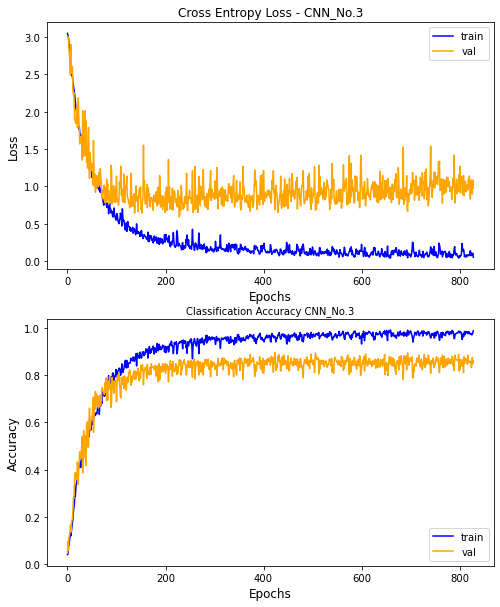

In [22]:
history_plot('CNN_No.3', history)

#### Saving our model to disk

A Keras model consists of multiple components:

+ An architecture, or configuration, which specifies what layers the model contain, and how they're connected.
+ A set of weights values (the "state of the model").
+ An optimizer (defined by compiling the model).
+ A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).
The Keras API makes it possible to save all of these pieces to disk at once, or to only selectively save some of them:

+ Saving everything into a single archive in the TensorFlow SavedModel format (or in the older Keras H5 format). This is the standard practice.
+ Saving the architecture / configuration only, typically as a JSON file.
+ Saving the weights values only. This is generally used when training the model.

In [23]:
saved_model = load_model(checkpoint_best_model)

from datetime import datetime
DTime = datetime.now().strftime('%Y%m%d_%H%M%S')

_, acc = saved_model.evaluate(X_train, y_train, verbose=0)
print('Model evaluate on train, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_val, y_val, verbose=0)
print('Model evaluate on val, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Model evaluate on test, Accuracy %.3f' % (acc * 100.0))
acc_test = round(100*acc,2)

save_file = checkpoint_best_model[0:-5] +'_' + DTime + '_ACC' + str(acc_test)+'.h5'
print("Model saved: ", save_file)
saved_model.save(save_file,  save_format="h5")

Model evaluate on train, Accuracy 99.762
Model evaluate on val, Accuracy 89.524
Model evaluate on test, Accuracy 83.810
Model saved:  model/MultiClass_1Conv_1Conv_1Conv_1Conv_20210227_224012_ACC83.81.h5


### Predict test data